d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,559 (299.06 KB)

 Trainable params: 76,559 (299.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 346s 989us/step - accuracy: 0.9207 - loss: 0.1694 - val_accuracy: 0.9592 - val_loss: 0.1421
Epoch 2/20
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 343s 995us/step - accuracy: 0.9390 - loss: 0.1269 - val_accuracy: 0.9629 - val_loss: 0.1236
Epoch 3/20
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 341s 989us/step - accuracy: 0.9419 - loss: 0.1223 - val_accuracy: 0.9646 - val_loss: 0.1240
Epoch 4/20
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 339s 985us/step - accuracy: 0.9430 - loss: 0.1207 - val_accuracy: 0.9628 - val_loss: 0.1292
Epoch 5/20
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 346s 1ms/step - accuracy: 0.9436 - loss: 0.1202 - val_accuracy: 0.9663 - val_loss: 0.1227
Epoch 6/20
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 341s 990us/step - accuracy: 0.9442 - loss: 0.1198 - val_accuracy: 0.9657 - val_loss: 0.1238
Epoch 7/20
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 339s 984us/step - accuracy: 0.9447 - loss: 0.1198 - val_accuracy: 0.9653 - val_loss: 0.1298
Epoch 8/20
343765/343765 ━━━━━━━━━━━

23633/23633 ━━━━━━━━━━━━━━━━━━━━ 13s 551us/step
Accuracy: 0.9672
Precision: 0.9822
Recall: 0.9672
F1-Score: 0.9731

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.96      0.98    628329
                       Bot       0.07      0.99      0.14       562
                      DDoS       0.96      1.00      0.98     38336
             DoS GoldenEye       0.89      1.00      0.94      3178
                  DoS Hulk       0.95      1.00      0.98     52052
          DoS Slowhttptest       0.80      0.99      0.89      1559
             DoS slowloris       0.91      0.99      0.95      1618
               FTP-Patator       0.90      1.00      0.95      1727
                Heartbleed       0.75      1.00      0.86         3
              Infiltration       0.07      0.64      0.12        11
                  PortScan       0.74      1.00      0.85     27248
               SSH-Patator       0.81      1

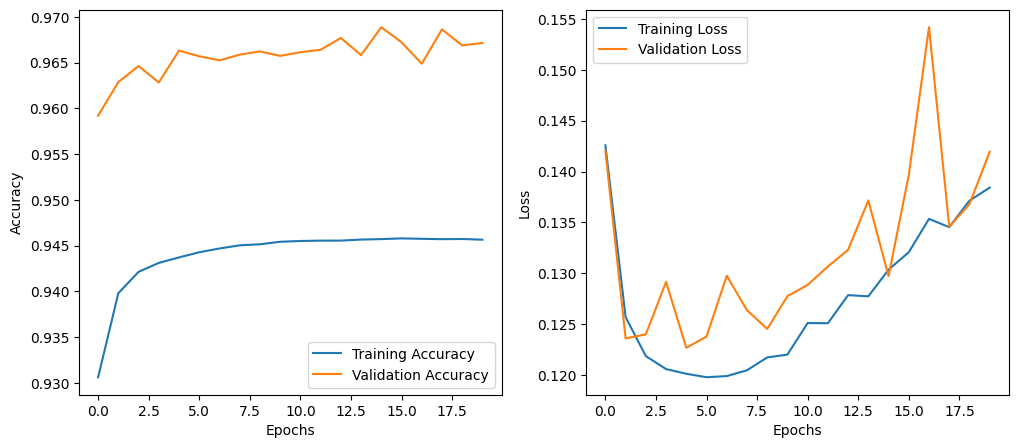

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Ensure no leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Verify if 'Label' column exists
if 'Label' not in df.columns:
    raise KeyError("'Label' column not found in the dataset")

selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]


X = df[selected_features]
y = df['Label']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape X for LSTM input (samples, timesteps, features)
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 1, X_train_resampled.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert labels to one-hot encoding
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Build the LSTM model
model = models.Sequential()

# Add LSTM layers
model.add(layers.LSTM(64, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), return_sequences=True))
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dropout(0.3))

# Add Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(y_train_resampled.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the trained model
model.save('lstm_model_selected_features.h5')

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)

# Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 371s 2ms/step - accuracy: 0.8897 - loss: 0.2817 - val_accuracy: 0.9520 - val_loss: 0.1583
Epoch 2/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 336s 2ms/step - accuracy: 0.9395 - loss: 0.1237 - val_accuracy: 0.9577 - val_loss: 0.1433
Epoch 3/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 336s 2ms/step - accuracy: 0.9426 - loss: 0.1158 - val_accuracy: 0.9637 - val_loss: 0.1297
Epoch 4/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 341s 2ms/step - accuracy: 0.9447 - loss: 0.1106 - val_accuracy: 0.9651 - val_loss: 0.1204
Epoch 5/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 337s 2ms/step - accuracy: 0.9457 - loss: 0.1075 - val_accuracy: 0.9663 - val_loss: 0.1142
Epoch 6/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 340s 2ms/step - accuracy: 0.9466 - loss: 0.1055 - val_accuracy: 0.9671 - val_loss: 0.1103
Epoch 7/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 340s 2ms/step - accuracy: 0.9470 - loss: 0.1040 - val_accuracy: 0.9689 - val_loss: 0.1060
Epoch 8/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 34

Test Accuracy: 97.30%
23633/23633 ━━━━━━━━━━━━━━━━━━━━ 14s 590us/step

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.97      0.98    628518
                       Bot       0.10      0.99      0.18       584
                      DDoS       1.00      1.00      1.00     38404
             DoS GoldenEye       0.90      1.00      0.95      3086
                  DoS Hulk       0.97      1.00      0.98     51854
          DoS Slowhttptest       0.94      1.00      0.97      1568
             DoS slowloris       0.97      0.99      0.98      1616
               FTP-Patator       0.99      1.00      0.99      1779
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.02      0.73      0.04        11
                  PortScan       0.74      1.00      0.85     27208
               SSH-Patator       0.84      0.97      0.90       966
  Web Attack � Brute 

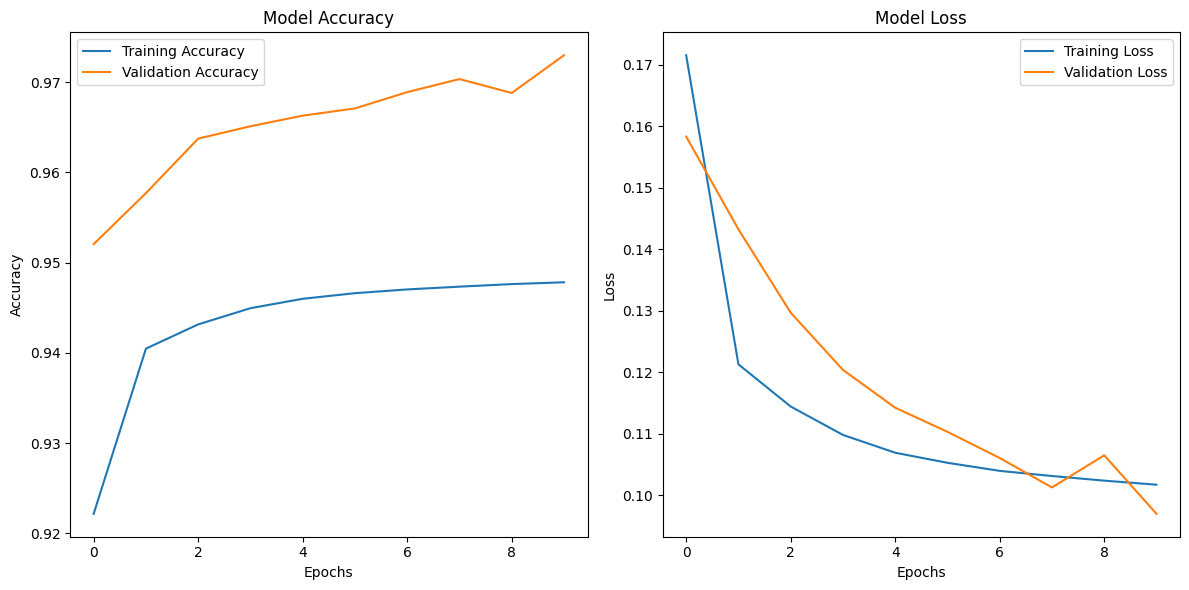

In [2]:
import os

# Set environment variables for CPU utilization **before importing TensorFlow**
os.environ["OMP_NUM_THREADS"] = "20"  
os.environ["TF_NUM_INTRAOP_THREADS"] = "20"
os.environ["TF_NUM_INTEROP_THREADS"] = "20"

# Now import TensorFlow and other libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Configure TensorFlow threading settings
tf.config.threading.set_intra_op_parallelism_threads(20)
tf.config.threading.set_inter_op_parallelism_threads(20)



# Load the dataset
df = pd.read_csv(r'C:\Users\kartik\Desktop\Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=1)  # Add time step dimension
X_test = np.expand_dims(X_test, axis=1)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Define the LSTM model
model = models.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
    layers.LSTM(128),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=10, batch_size=128, 
                    validation_data=(X_test, y_test))

# Save the LSTM model
model.save('lstm_model_opt.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


Epoch 1/30


c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3728 - loss: 2.1380 - val_accuracy: 0.5633 - val_loss: 1.7108
Epoch 2/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5382 - loss: 1.5126 - val_accuracy: 0.7873 - val_loss: 0.9947
Epoch 3/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.9224 - val_accuracy: 0.8801 - val_loss: 0.5107
Epoch 4/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.5266 - val_accuracy: 0.9078 - val_loss: 0.3056
Epoch 5/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9099 - loss: 0.3514 - val_accuracy: 0.9324 - val_loss: 0.2186
Epoch 6/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.2655 - val_accuracy: 0.9568 - val_loss: 0.1752
Epoch 7/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9476 - loss: 0.2225 - val_accuracy: 0.9611 - val_loss: 0.1503
Epoch 8/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9545 - loss: 0.1918 - val_accuracy: 0.9662 - val_

Test Accuracy: 98.36%
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step

Classification Report:
                  precision    recall  f1-score   support

          BENIGN       0.97      0.93      0.95      1500
            DDoS       0.99      1.00      0.99      1500
   DoS GoldenEye       0.98      1.00      0.99      1500
        DoS Hulk       0.98      0.99      0.98      1500
DoS Slowhttptest       0.99      0.99      0.99      1500
   DoS slowloris       0.99      0.99      0.99      1500
     FTP-Patator       0.99      1.00      0.99      1500
   Other Attacks       0.97      0.98      0.98       966
        PortScan       0.98      0.98      0.98      1500

        accuracy                           0.98     12966
       macro avg       0.98      0.98      0.98     12966
    weighted avg       0.98      0.98      0.98     12966



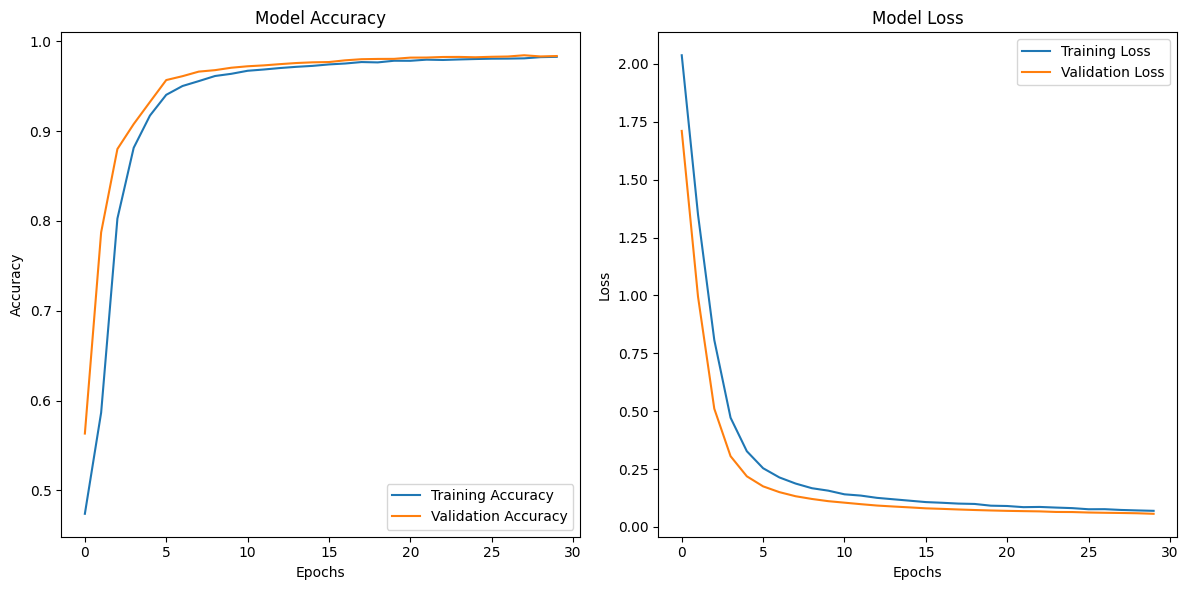

In [3]:
import os

# Set environment variables for CPU utilization **before importing TensorFlow**
os.environ["OMP_NUM_THREADS"] = "20"  
os.environ["TF_NUM_INTRAOP_THREADS"] = "20"
os.environ["TF_NUM_INTEROP_THREADS"] = "20"

# Now import TensorFlow and other libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Configure TensorFlow threading settings
tf.config.threading.set_intra_op_parallelism_threads(20)
tf.config.threading.set_inter_op_parallelism_threads(20)



# Load the dataset
df = pd.read_csv(r'D:\Kartikey\.venv\balanced.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Attack Type']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=1)  # Add time step dimension
X_test = np.expand_dims(X_test, axis=1)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Define the LSTM model
model = models.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
    layers.LSTM(128),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=30, batch_size=128, 
                    validation_data=(X_test, y_test))

# Save the LSTM model
model.save('balanced_lstm_model_opt.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()